<a href="https://colab.research.google.com/github/Hatsuhinode/Feature-Engineering/blob/main/Start_End_Of_Distribution_Imputation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/ColabNotebooks/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 43.7MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Handling missing values

## Start/End of distribution data imputation.

Start/End of distribution data imputation involves replacing missing values with values at the beginning or end of the distribution of non-missing values in the dataset.


If the missing values are numeric, it involves replacing the missing values with the lowest or maximum value of the dataset's non-missing values.

If the missing values are categorical, the procedure involves filling in the gaps with the most often occurring category (i.e., mode).

 **The main drawback is that we might end up with a distorted dataset as the mean and variance of distribution might change significantly.**


In [ ]:
titanicDataframe = pd.read_csv('train.csv')
titanicDataframe.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
titanicDataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanicDf = pd.read_csv('train.csv', usecols = ['PassengerId','Age','Fare','Survived'])
titanicDf.head(6)

,PassengerId,Survived,Age,Fare
0,1,0,22.0,7.2500
1,2,1,38.0,71.2833
2,3,1,26.0,7.9250
3,4,1,35.0,53.1000
4,5,0,35.0,8.0500
5,6,0,NaN,8.4583


In [ ]:
titanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   Fare         891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
titanicDf.isnull().sum()

PassengerId      0
Survived         0
Age            177
Fare             0
dtype: int64

In [ ]:
titanicDf.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Age            0.198653
Fare           0.000000
dtype: float64

---

### Boxplot to determine outliers in 'Age_S_E_Distribution' column

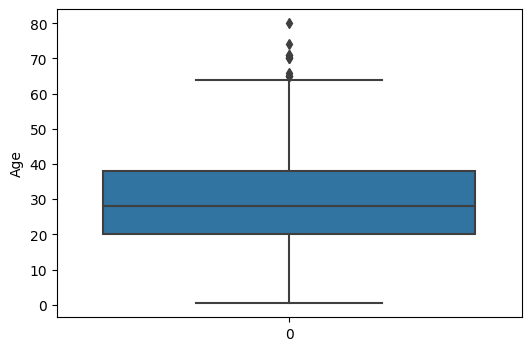

In [ ]:
fig = plt.figure(figsize = (6,4))
plt.ylabel('Age')
sns.boxplot (data = titanicDf['Age']);

#### Histogram to observe extreme values

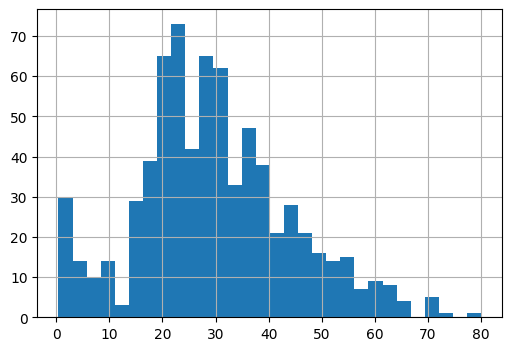

In [ ]:
fig = plt.figure(figsize = (6,4))
titanicDf['Age'].hist(bins = 30);

---

In [ ]:
def Imputation(dataframe, feature, imputationMethod, S_E_Value):
    dataframe[feature + 'Median'] = dataframe[feature].fillna(imputationMethod)
    dataframe[feature + '_S_E_Distribution'] = dataframe[feature].fillna(S_E_Value)



In [ ]:
median = titanicDf['Age'].median()
extremeValue = titanicDf['Age'].mean() + (3 * titanicDf['Age'].std())
Imputation(titanicDf, 'Age', median,extremeValue)

print('The median of "Age" data in titanicDf is : ', median)
print('The extreme value beyond 3 std is : ', extremeValue)

The median of "Age" data in titanicDf is :  28.0
The extreme value beyond 3 std is :  73.27860964406094


In [ ]:
titanicDf.head(7)

,PassengerId,Survived,Age,Fare,AgeMedian,AgeS_E_Distribution,Age_S_E_Distribution
0,1,0,22.0,7.2500,22.0,22.00000,22.00000
1,2,1,38.0,71.2833,38.0,38.00000,38.00000
2,3,1,26.0,7.9250,26.0,26.00000,26.00000
3,4,1,35.0,53.1000,35.0,35.00000,35.00000
4,5,0,35.0,8.0500,35.0,35.00000,35.00000
5,6,0,NaN,8.4583,28.0,73.27861,73.27861
6,7,0,54.0,51.8625,54.0,54.00000,54.00000


### Variation in standard deviation in data of 'Age', 'AgeMedian' and 'Age_S_E_Distribution' column

In [ ]:
print('The standard deviation of data in column "Age" is : ',titanicDf['Age'].std())
print('The standard deviation of data in column "AgeMedian" is : ',titanicDf['AgeMedian'].std())
print('The standard deviation of data in column "Age_S_E_Distribution" is : ',titanicDf['Age_S_E_Distribution'].std())

The standard deviation of data in column "Age" is :  14.526497332334042
The standard deviation of data in column "AgeMedian" is :  13.019696550973201
The standard deviation of data in column "Age_S_E_Distribution" is :  21.719150677136394


### Graphical representation of data in 'Age', 'AgeMedian' and 'Age_S_E_Distribution' column

#### Kernel Density Estimate (KDE)

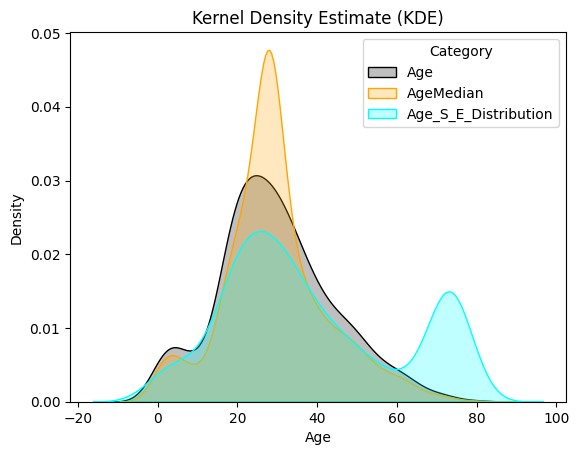

In [ ]:
sns.kdeplot(titanicDf['Age'],color = 'black', fill=True, label = 'Age')
sns.kdeplot(titanicDf['AgeMedian'],color = 'orange', fill=True, label = 'AgeMedian')
sns.kdeplot(titanicDf['Age_S_E_Distribution'],color = 'aqua', fill=True, label = 'Age_S_E_Distribution')

plt.title('Kernel Density Estimate (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Category')

plt.show()

---

#### Histogram

##### Plot of AgeMedian

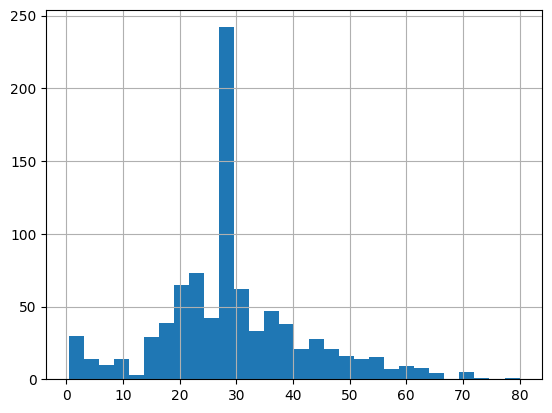

In [ ]:
titanicDf.AgeMedian.hist(bins = 30);

##### Plot of Age_S_E_Distribution

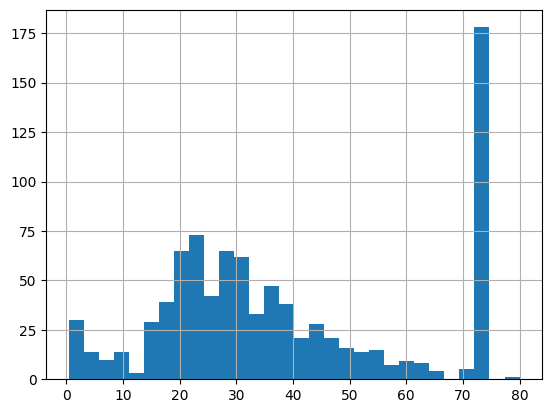

In [ ]:
titanicDf.Age_S_E_Distribution.hist(bins = 30);

### Boxplot to observe outliers in 'AgeMedian' column


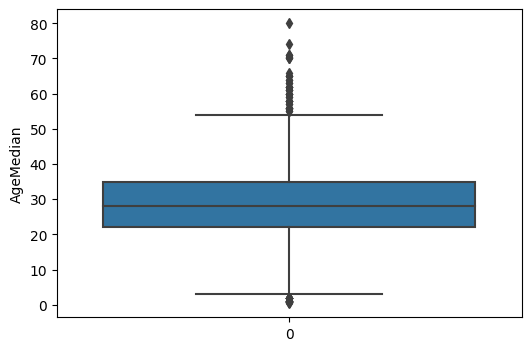

In [ ]:
fig = plt.figure(figsize = (6,4))
plt.ylabel('AgeMedian')
sns.boxplot (data = titanicDf['AgeMedian']);

### Boxplot to observe outliers in 'Age_S_E_Distribution' column




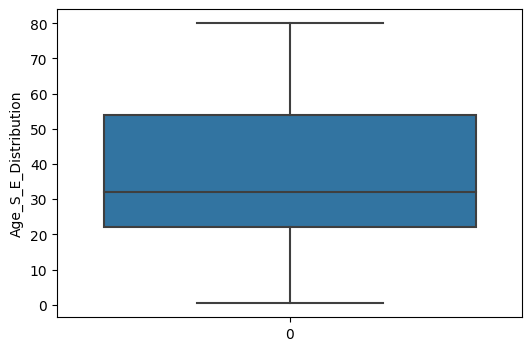

In [ ]:
fig = plt.figure(figsize = (6,4))
plt.ylabel('Age_S_E_Distribution')
sns.boxplot (data = titanicDf['Age_S_E_Distribution']);